<a href="https://colab.research.google.com/github/David-gutierrez-rodriguez/Ejercicioss/blob/main/Modelo_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import warnings

warnings.filterwarnings("ignore")

# --- 1. Cargar y Preparar los Datos ---
archivo_excel = 'datos.xlsx'
columna_fecha = 'Año'
columna_valor = 'C. feb'

print(f"Cargando datos desde {archivo_excel}...")
df = pd.read_excel(
    archivo_excel,
    engine='openpyxl',
    index_col=columna_fecha,
    parse_dates=True
)
df.sort_index(inplace=True)

# *** CAMBIO CLAVE 1: Frecuencia Anual ('AS') ***
serie = df[columna_valor].asfreq('AS')
serie.fillna(method='ffill', inplace=True)
print("Datos cargados exitosamente.")


# --- 2. Búsqueda de Hiperparámetros (Grid Search) ---
print("\nIniciando búsqueda manual de parámetros (Grid Search)...")

# Define los rangos de p, d, q
p = d = q = range(0, 3) # Rango de 0 a 2

# Generar todas las combinaciones (p,d,q)
pdq = list(itertools.product(p, d, q))

# *** CAMBIO CLAVE 2: ELIMINAR BÚSQUEDA ESTACIONAL ***
# Ya no necesitamos 'm' ni 'seasonal_pdq'

# Variables para almacenar el mejor modelo
best_aic = float('inf')
best_pdq = None
best_model_results = None

# --- Bucle de búsqueda simplificado ---
# Iteramos SOLO sobre las combinaciones no estacionales
for param in pdq:
    try:
        # *** CAMBIO CLAVE 3: Usar sm.tsa.ARIMA o SARIMAX con seasonal_order=(0,0,0,0) ***
        # sm.tsa.ARIMA es más limpio
        model = sm.tsa.ARIMA(
            serie,
            order=param
        )

        results = model.fit() # disp=False ya no es necesario en ARIMA

        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model_results = results
            print(f"Nuevo mejor modelo: ARIMA{param} - AIC:{results.aic:.2f}")

    except Exception as e:
        continue

print("\n--- Búsqueda Finalizada ---")
print(f"Mejor Modelo: ARIMA{best_pdq}")
print(f"Mejor AIC: {best_aic:.2f}")

print("\n--- Resumen del Mejor Modelo ---")
print(best_model_results.summary())

Cargando datos desde datos.xlsx...
Datos cargados exitosamente.

Iniciando búsqueda manual de parámetros (Grid Search)...
Nuevo mejor modelo: ARIMA(0, 0, 0) - AIC:97.85
Nuevo mejor modelo: ARIMA(0, 0, 1) - AIC:95.21
Nuevo mejor modelo: ARIMA(0, 0, 2) - AIC:92.85
Nuevo mejor modelo: ARIMA(0, 1, 0) - AIC:77.58
Nuevo mejor modelo: ARIMA(0, 1, 2) - AIC:76.26
Nuevo mejor modelo: ARIMA(0, 2, 1) - AIC:73.00
Nuevo mejor modelo: ARIMA(0, 2, 2) - AIC:69.45
Nuevo mejor modelo: ARIMA(1, 2, 1) - AIC:68.00
Nuevo mejor modelo: ARIMA(1, 2, 2) - AIC:66.19

--- Búsqueda Finalizada ---
Mejor Modelo: ARIMA(1, 2, 2)
Mejor AIC: 66.19

--- Resumen del Mejor Modelo ---
                               SARIMAX Results                                
Dep. Variable:                 C. feb   No. Observations:                   11
Model:                 ARIMA(1, 2, 2)   Log Likelihood                 -29.094
Date:                Thu, 06 Nov 2025   AIC                             66.188
Time:                        0


Generando pronóstico para los próximos 10 años...
Visualizando resultados...


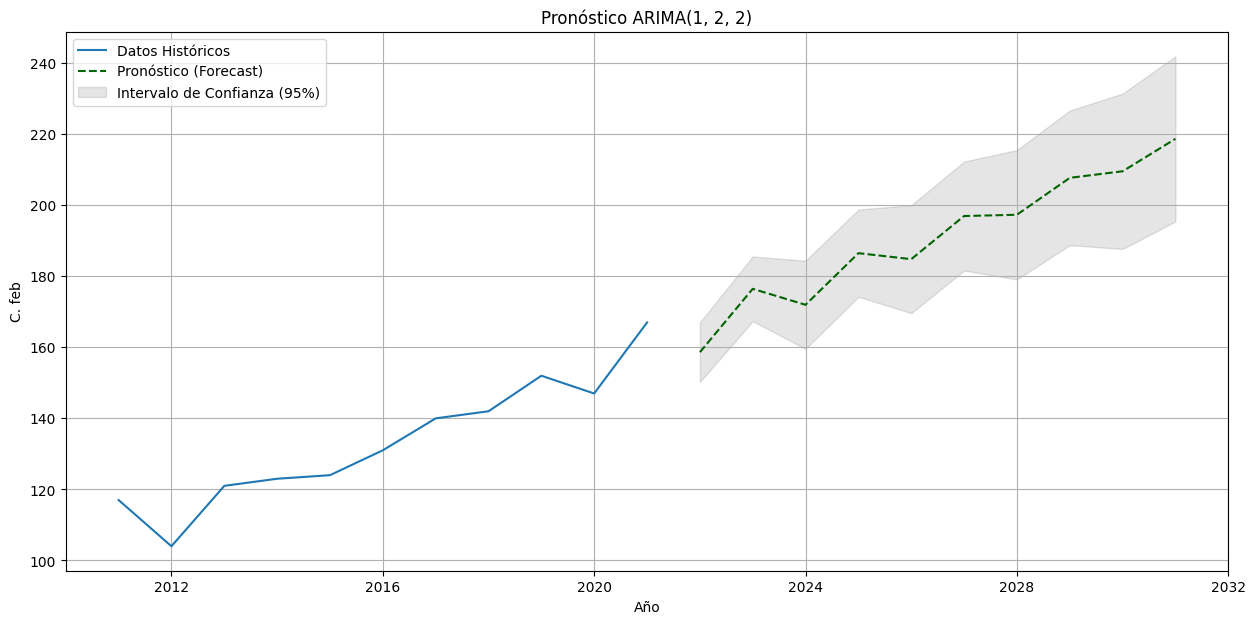


¡Proceso completado!


In [54]:
# --- 3. Generar el Pronóstico (Forecast) ---
# *** CAMBIO CLAVE 4: 'n_periodos' ahora son AÑOS ***
n_periodos_forecast = 10 # 10 años

print(f"\nGenerando pronóstico para los próximos {n_periodos_forecast} años...")

forecast_obj = best_model_results.get_forecast(steps=n_periodos_forecast)
forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int(alpha=0.05)
conf_int_lower = conf_int.iloc[:, 0]
conf_int_upper = conf_int.iloc[:, 1]


# --- 4. Visualizar los Resultados ---
print("Visualizando resultados...")

plt.figure(figsize=(15, 7))
plt.plot(serie, label='Datos Históricos')
plt.plot(forecast, label='Pronóstico (Forecast)', color='darkgreen', linestyle='--')
plt.fill_between(
    conf_int.index,
    conf_int_lower,
    conf_int_upper,
    color='k',
    alpha=0.1,
    label='Intervalo de Confianza (95%)'
)

plt.title(f'Pronóstico ARIMA{best_pdq}')
plt.xlabel('Año')
plt.ylabel(columna_valor)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

print("\n¡Proceso completado!")